In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## Partie 1 : Prima Dataset

In [3]:
pima = np.load("pima.npz")
digits = np.load("digits.npz")


x1 = pima['xall']
y1 = pima['yall']
names = pima['varnames']
x2= digits['x'] / 255
y2 = digits['y']
xt2= digits['xt'] / 255
yt2 = digits['yt']

In [4]:
mean_pima = np.mean(x1, axis=0)
print(f"{names}: {mean_pima}")


['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']: [  3.74753173 121.60789845  69.64315938  20.76586742  80.53173484
  32.45303244   0.47096051  33.02115656]


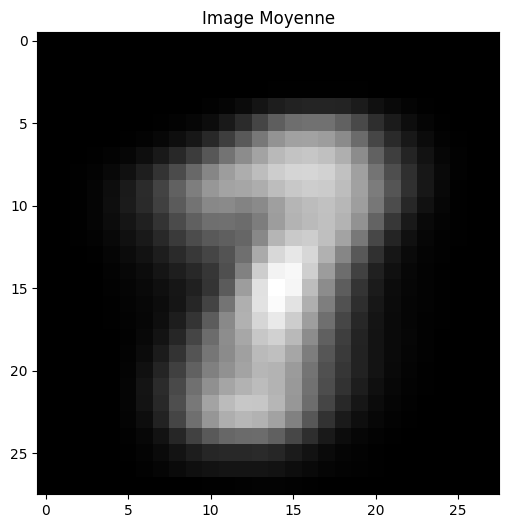

In [5]:
img_moy  = np.zeros(784)
for i in range(784):
    img_moy[i] = np.mean(x2[:,i])
img_moy = img_moy.reshape(28, 28)
plt.figure(figsize=(12, 6))
plt.title("Image Moyenne")
plt.imshow(img_moy, cmap='gray')

In [49]:
varnames1 = pima['varnames']
df_pima = pd.DataFrame(data=x1, columns=varnames1)
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000


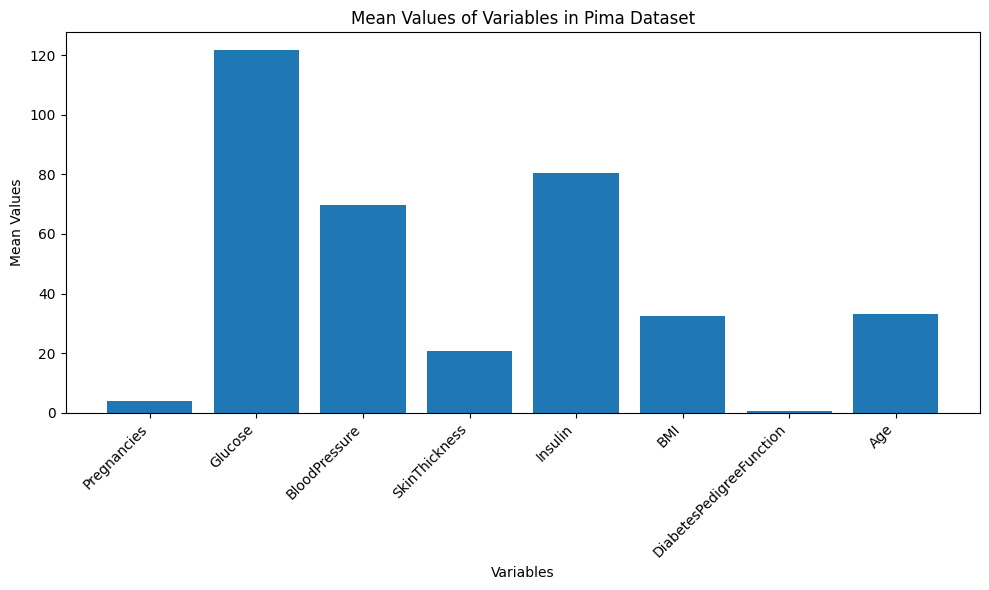

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(names, mean_pima)
plt.xlabel('Variables')
plt.ylabel('Mean Values')
plt.title('Mean Values of Variables in Pima Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2 - Predicting Diabetes on the Pima dataset

## 2.1 Know the data

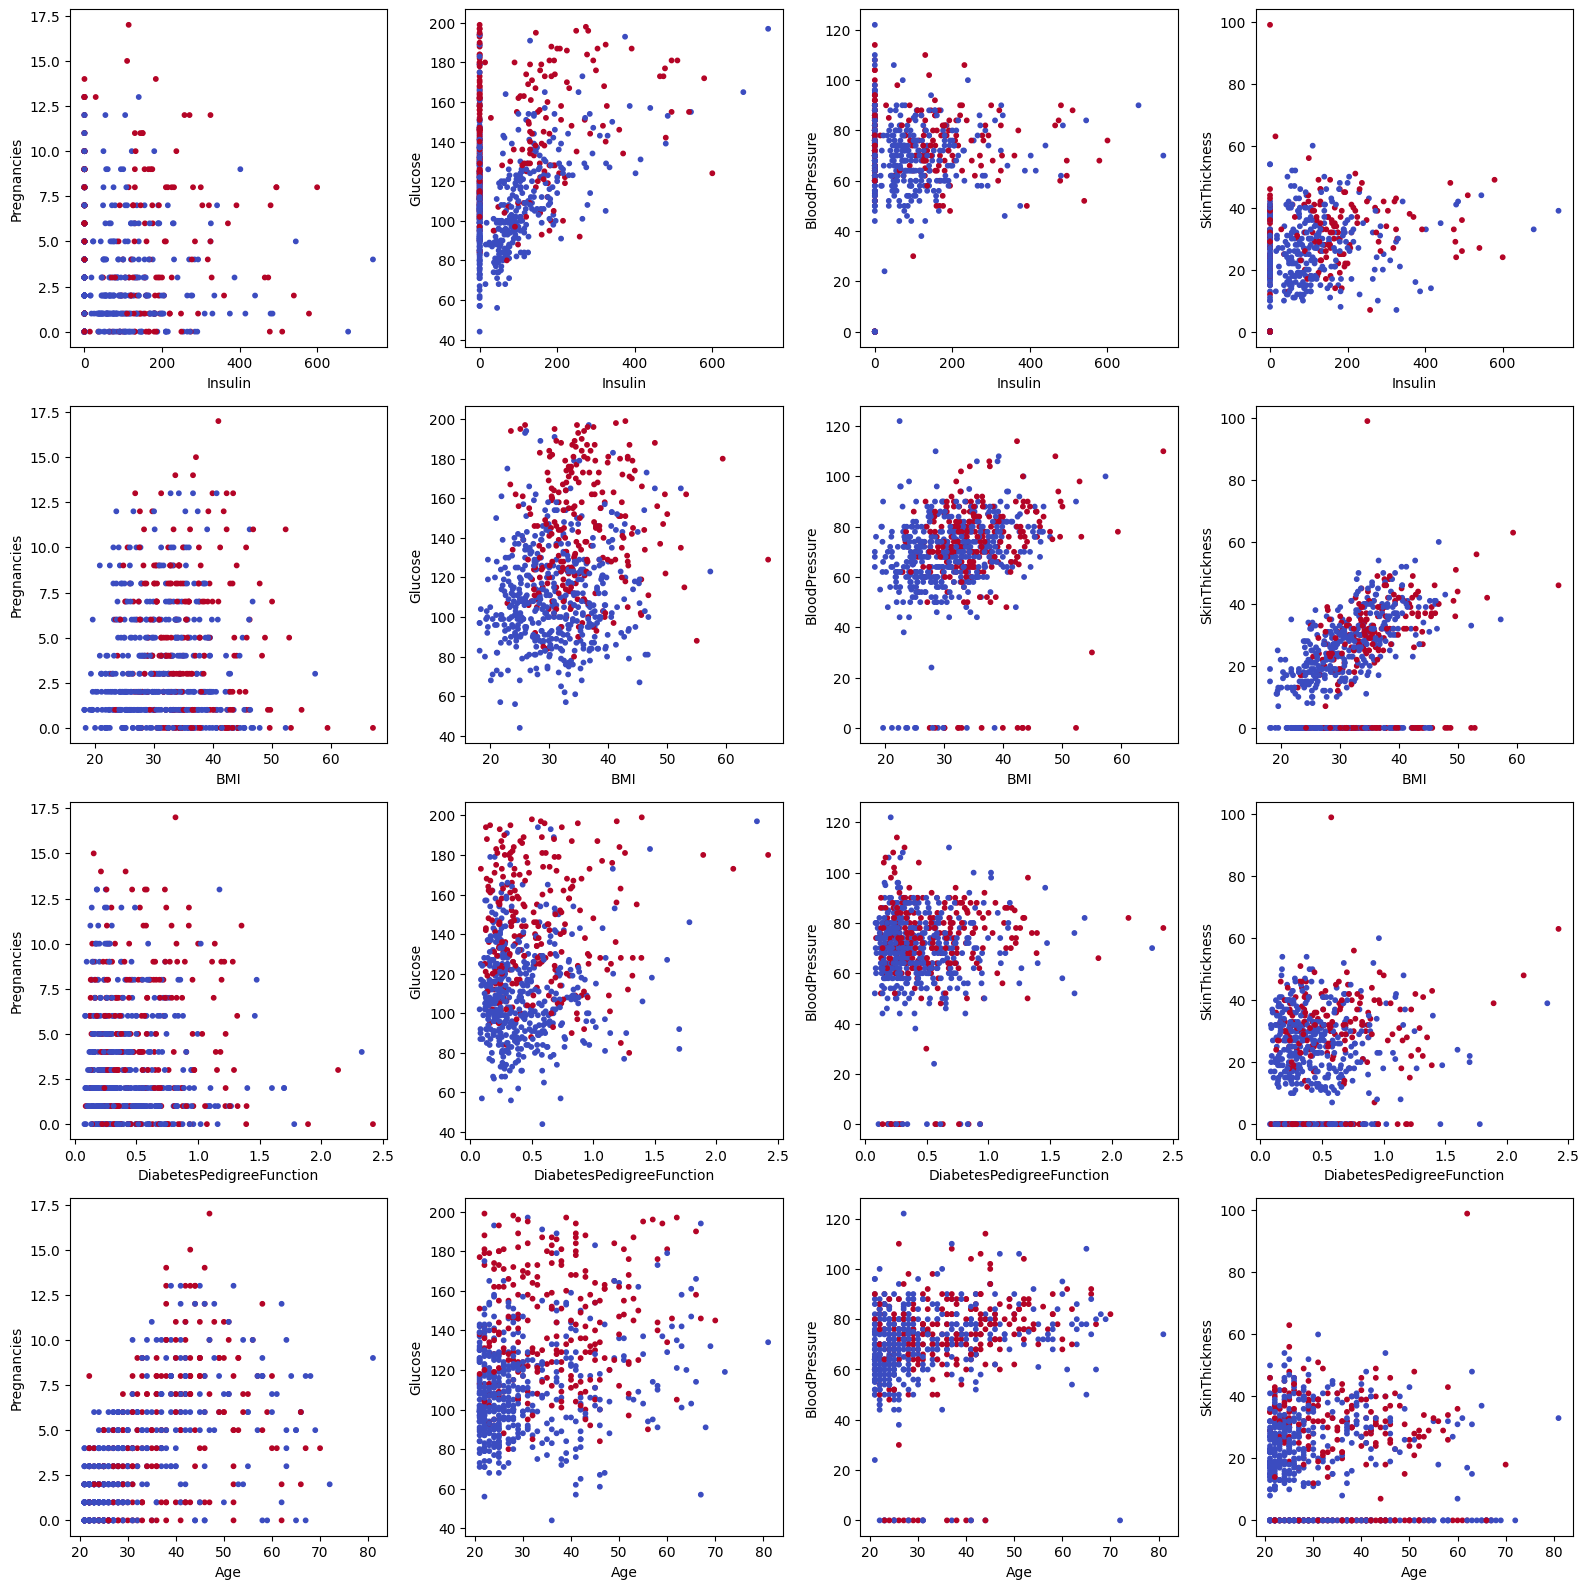

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
            axs[i, j].scatter(x1[:, i+4], x1[:, j], c=y1, cmap='coolwarm', s=10)
            axs[i, j].set_xlabel(names[i+4])
            axs[i, j].set_ylabel(names[j])


# Adjust layout
plt.tight_layout()
plt.show()

## Observations pertinentes

Text(0, 0.5, 'BMI')

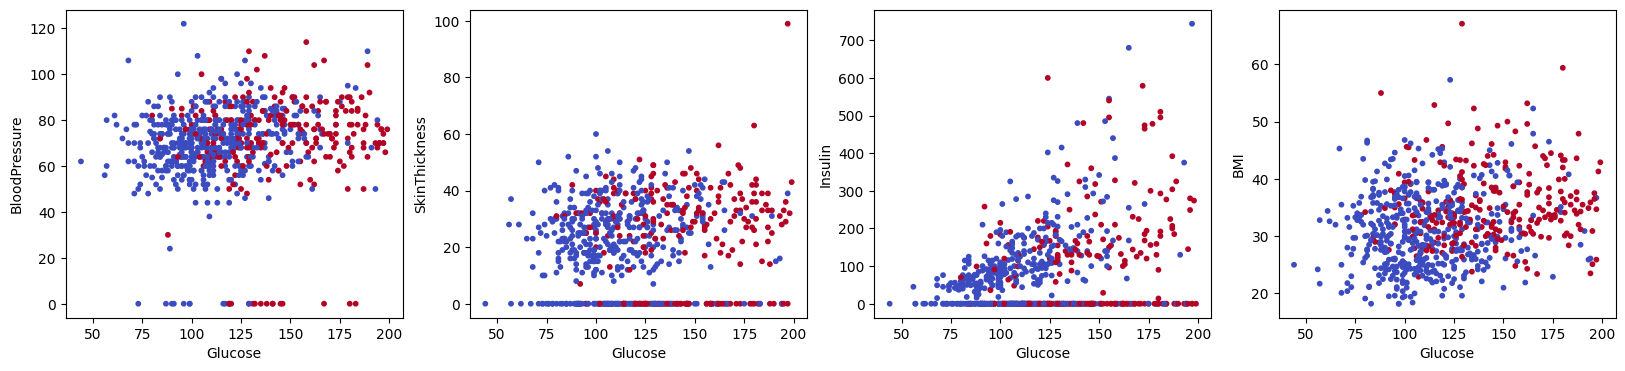

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))


axs[0].scatter(x1[:, 1], x1[:, 2], c=y1, cmap='coolwarm', s=10)
axs[1].scatter(x1[:, 1], x1[:, 3], c=y1, cmap='coolwarm', s=10)
axs[2].scatter(x1[:, 1], x1[:, 4], c=y1, cmap='coolwarm', s=10)
axs[3].scatter(x1[:, 1], x1[:, 5], c=y1, cmap='coolwarm', s=10)

axs[0].set_xlabel(names[1])
axs[0].set_ylabel(names[2])
axs[1].set_xlabel(names[1])
axs[1].set_ylabel(names[3])
axs[2].set_xlabel(names[1])
axs[2].set_ylabel(names[4])
axs[3].set_xlabel(names[1])
axs[3].set_ylabel(names[5])

## Observations :

The variables observed in pairs don't seem to help identify two clear clusters. The only feature that seems to help to roughly divide the two classes is the “Glucose” feature. This first observation is quite coherent from a medical point of view for predicting diabetes.

Note: use seaborn pairplot for next time.



In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=300, random_state=42, stratify=y1)

In [10]:
print("Training set (features):", x_train.shape)
print("Test set (features):", x_test.shape)
print("Training set (labels):", y_train.shape)
print("Test set (labels):", y_test.shape)

Training set (features): (300, 8)
Test set (features): (409, 8)
Training set (labels): (300,)
Test set (labels): (409,)


In [11]:
x_train_df = pd.DataFrame(x_train, columns=names)

# Variance for each feature
train_variances = x_train_df.var()

# Range for each feature
train_scaling = x_train_df.max() - x_train_df.min()

print("Variances for each feature in x_train:")
print(train_variances)

print("\nScaling (range) for each feature in x_train:")
print(train_scaling)

Variances for each feature in x_train:
Pregnancies                     9.506923
Glucose                       901.935106
BloodPressure                 394.715485
SkinThickness                 254.457915
Insulin                     13580.705139
BMI                            53.667456
DiabetesPedigreeFunction        0.097594
Age                           132.098317
dtype: float64

Scaling (range) for each feature in x_train:
Pregnancies                  14.000
Glucose                     153.000
BloodPressure               110.000
SkinThickness                99.000
Insulin                     744.000
BMI                          48.900
DiabetesPedigreeFunction      2.251
Age                          51.000
dtype: float64


## Observation:

Variances and ranges are widely dispersed, making the data difficult to use.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=names)

# Variance for each feature
train_variances = x_train_scaled_df.var()

# Range for each feature
train_scaling = x_train_scaled_df.max() - x_train_scaled_df.min()

print("Variances for each feature in x_train:")
print(train_variances)

print("\nScaling (range) for each feature in x_train:")
print(train_scaling)

Variances for each feature in x_train:
Pregnancies                 1.003344
Glucose                     1.003344
BloodPressure               1.003344
SkinThickness               1.003344
Insulin                     1.003344
BMI                         1.003344
DiabetesPedigreeFunction    1.003344
Age                         1.003344
dtype: float64

Scaling (range) for each feature in x_train:
Pregnancies                 4.548132
Glucose                     5.103038
BloodPressure               5.545946
SkinThickness               6.216590
Insulin                     6.394945
BMI                         6.686185
DiabetesPedigreeFunction    7.217533
Age                         4.444742
dtype: float64


## Observation:

Variances and ranges are now consistent between variables thanks to StandardScaler()

## 2.2 Bayesian decision and linear classification

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, accuracy_score
from IPython.display import display

lda = LinearDiscriminantAnalysis()


lda.fit(x_train_scaled, y_train)

y_prob = lda.predict_proba(x_test_scaled)[:, 1]  # Keep the second column (probability of class 1)

y_pred = lda.predict(x_test_scaled)

accuracy_LDA = accuracy_score(y_test, y_pred)

auc_LDA = roc_auc_score(y_test, y_prob)


data = {
    "LDA": [auc_LDA, accuracy_LDA],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA
AUC,0.843494
Accuracy,0.794621


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.01, 0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}


scorer = make_scorer(roc_auc_score)

grid_search = GridSearchCV(lda, param_grid, scoring=scorer, cv=5, verbose=1)

grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

best_lda = grid_search.best_estimator_

y_prob = best_lda.predict_proba(x_test_scaled)[:, 1]

y_pred = best_lda.predict(x_test_scaled)

auc_LDA_opt = roc_auc_score(y_test, y_prob)

accuracy_LDA_opt = accuracy_score(y_test, y_pred)

print(f"Best parameters found: {best_params}")

data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters found: {'shrinkage': 0.6, 'solver': 'lsqr'}


,LDA,LDA + Grid Search
AUC,0.843494,0.843627
Accuracy,0.794621,0.782396


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
import pandas as pd


param_grid = [
    {'solver': ['svd'], 'shrinkage': [None]},  
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': [None] + [round(i * 0.01, 2) for i in range(51)], 
    }
]

scorer = make_scorer(roc_auc_score)

grid_search = GridSearchCV(lda, param_grid, scoring=scorer, cv=10, verbose=1, error_score='raise')

grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_
best_lda = grid_search.best_estimator_


y_prob = best_lda.predict_proba(x_test_scaled)[:, 1]
y_pred = best_lda.predict(x_test_scaled)


auc_LDA_opt = roc_auc_score(y_test, y_prob)
accuracy_LDA_opt = accuracy_score(y_test, y_pred)

print(f"Best parameters found: {best_params}")


data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits
Best parameters found: {'shrinkage': 0.12, 'solver': 'lsqr'}


,LDA,LDA + Grid Search
AUC,0.843494,0.844822
Accuracy,0.794621,0.789731


## Observation :

There's no improvement with GridSearch. To set a shrinkage we change 'svd' to 'lsqr' or 'eigen' here. The AUC score is very slightly better for a shrinkage of 0.12 than with the default parameters, but the accuracy is slightly lower than with the default model. 

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, accuracy_score

qda = QuadraticDiscriminantAnalysis()


qda.fit(x_train_scaled, y_train)

y_prob_qda = qda.predict_proba(x_test_scaled)[:, 1]

y_pred_qda = qda.predict(x_test_scaled)

accuracy_QDA = accuracy_score(y_test, y_pred_qda)

auc_QDA = roc_auc_score(y_test, y_prob_qda)

data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
    "QDA": [auc_QDA, accuracy_QDA],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,LDA + Grid Search,QDA
AUC,0.843494,0.844822,0.810887
Accuracy,0.794621,0.789731,0.740831


## Observations:

AUC and Accuracy results are poorer with QDA than with LDA.

In [18]:
import numpy as np
import pandas as pd



param_grid = {'reg_param': np.linspace(0.0, 1.0, 30)}


qda = QuadraticDiscriminantAnalysis()


grid_search = GridSearchCV(qda, param_grid, scoring='roc_auc', cv=10, verbose=1)
grid_search.fit(x_train_scaled, y_train)


best_qda = grid_search.best_estimator_
best_params_qda = grid_search.best_params_
optimal_reg = best_params_qda['reg_param']
auc_QDA_opt = grid_search.best_score_


y_pred_best_qda = best_qda.predict(x_test_scaled)
y_prob_best_qda = best_qda.predict_proba(x_test_scaled)[:, 1]
accuracy_QDA_opt = accuracy_score(y_test, y_pred_best_qda)


data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
    "QDA": [auc_QDA, accuracy_QDA],
    f"QDA + reg = {optimal_reg:.2f}": [auc_QDA_opt, accuracy_QDA_opt],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)
display(df_results)




Fitting 10 folds for each of 30 candidates, totalling 300 fits


,LDA,LDA + Grid Search,QDA,QDA + reg = 0.76
AUC,0.843494,0.844822,0.810887,0.844947
Accuracy,0.794621,0.789731,0.740831,0.775061


## Observations :

Performance is slightly better for QDA with reg parameter optimization. But the performance obtained does not surpass LDA with respect to both accuracy and AUC. 

In [19]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train_scaled, y_train)
y_prob_clf = clf.predict_proba(x_test_scaled)[:, 1]

y_pred_clf = clf.predict(x_test_scaled)

accuracy_G = accuracy_score(y_test, y_pred_clf)

auc_G  = roc_auc_score(y_test, y_prob_clf)


data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
    "QDA": [auc_QDA, accuracy_QDA],
    f"QDA + reg = {optimal_reg:.2f}": [auc_QDA_opt, accuracy_QDA_opt],
    "GaussianNB": [auc_G, accuracy_G],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,LDA + Grid Search,QDA,QDA + reg = 0.76,GaussianNB
AUC,0.843494,0.844822,0.810887,0.844947,0.833882
Accuracy,0.794621,0.789731,0.740831,0.775061,0.770171


In [20]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train_scaled, y_train)
y_prob_log = log.predict_proba(x_test_scaled)[:, 1]

y_pred_log = clf.predict(x_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)

auc_log  = roc_auc_score(y_test, y_prob_log)

data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
    "QDA": [auc_QDA, accuracy_QDA],
    f"QDA + reg = {optimal_reg:.2f}": [auc_QDA_opt, accuracy_QDA_opt],
    "GaussianNB": [auc_G, accuracy_G],
    "Logistic Regression": [auc_log, accuracy_log],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,LDA + Grid Search,QDA,QDA + reg = 0.76,GaussianNB,Logistic Regression
AUC,0.843494,0.844822,0.810887,0.844947,0.833882,0.842618
Accuracy,0.794621,0.789731,0.740831,0.775061,0.770171,0.770171


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


,LDA,LDA + Grid Search,QDA,QDA + reg = 0.76,GaussianNB,Logistic Regression,Logistic Regression + penalty l1 with C = 0.54
AUC,0.843494,0.844822,0.810887,0.844947,0.833882,0.842618,0.842671
Accuracy,0.794621,0.789731,0.740831,0.775061,0.770171,0.770171,0.784841


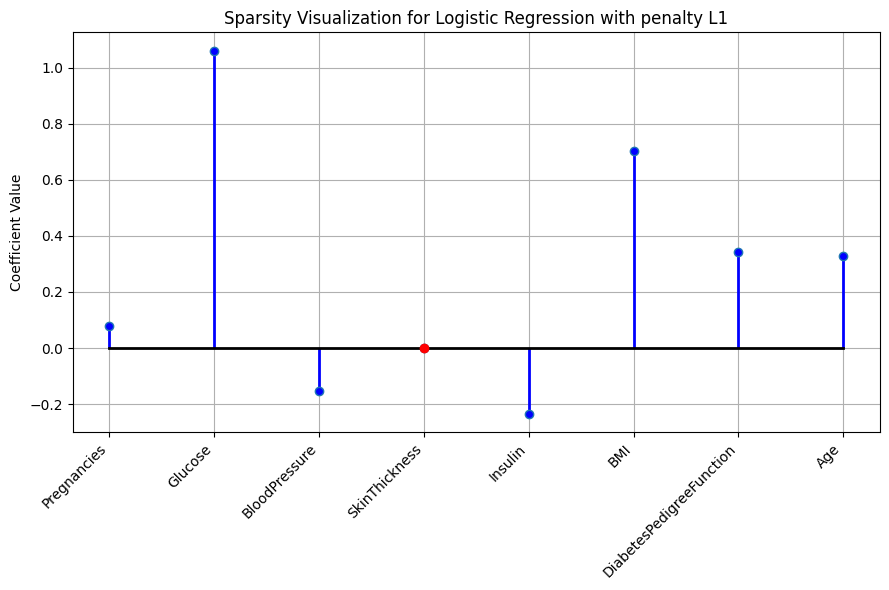

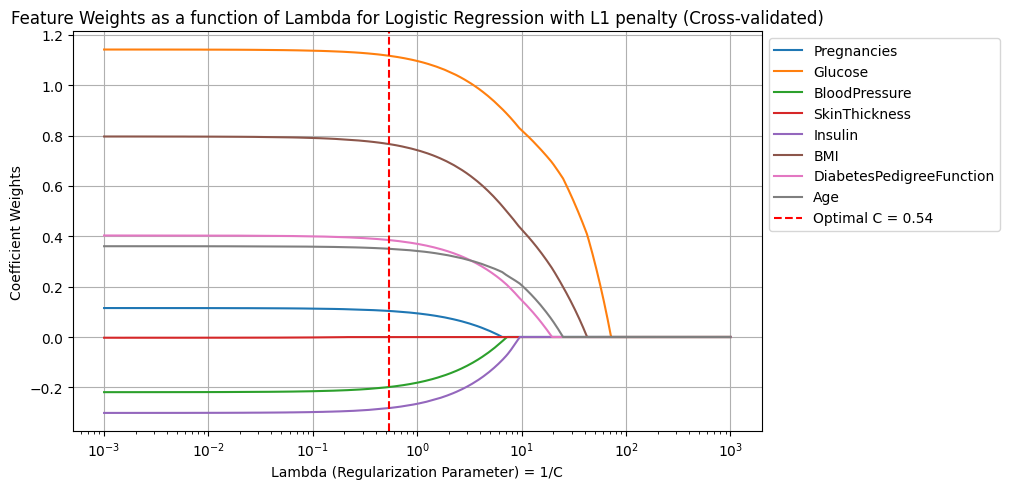

In [21]:

from sklearn.linear_model import LogisticRegression


param_grid = {'C': np.logspace(-3, 3, 1000)}
lambda_values = 1 / param_grid['C']  


log = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

grid_search = GridSearchCV(log, param_grid, scoring='roc_auc', cv=10, verbose=1)
grid_search.fit(x_train_scaled, y_train)

best_log = grid_search.best_estimator_
best_params_log = grid_search.best_params_
optimal_C = best_params_log['C']
optimal_lambda = 1 / optimal_C

auc_scores = grid_search.cv_results_['mean_test_score']

coefficients= []
for C in param_grid['C']:
    log = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    log.fit(x_train_scaled, y_train)
    coefficients.append(log.coef_.flatten())

coefficients = np.array(coefficients)


y_prob_best_log = best_log.predict_proba(x_test_scaled)[:, 1]
y_pred_best_log = best_log.predict(x_test_scaled)

accuracy_log_opt = accuracy_score(y_test, y_pred_best_log)
auc_log_opt = roc_auc_score(y_test, y_prob_best_log)


data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "LDA + Grid Search": [auc_LDA_opt, accuracy_LDA_opt],
    "QDA": [auc_QDA, accuracy_QDA],
    f"QDA + reg = {optimal_reg:.2f}": [auc_QDA_opt, accuracy_QDA_opt],
    "GaussianNB": [auc_G, accuracy_G],
    "Logistic Regression": [auc_log, accuracy_log],
    f"Logistic Regression + penalty l1 with C = {optimal_C:.2f}": [auc_log_opt, accuracy_log_opt],
}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

coeff = best_log.coef_.flatten()

plt.figure(figsize=(9, 6))
markerline, stemlines, baseline = plt.stem(range(len(coeff)), coeff)
plt.setp(markerline, markerfacecolor ='blue', markersize =  6)
plt.setp(stemlines, color = 'blue', linewidth = 2)
plt.setp(baseline, color = 'black', linewidth = 2)

zeroed_indices = np.where(coeff == 0)[0]
plt.stem(zeroed_indices, coeff[zeroed_indices], linefmt='red', markerfmt='ro', basefmt=" ")

plt.ylabel("Coefficient Value")
plt.title("Sparsity Visualization for Logistic Regression with penalty L1")
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

for i in range(coefficients.shape[1]):
    plt.plot(lambda_values, coefficients[:, i], label=names[i])

plt.xscale("log")
plt.xlabel("Lambda (Regularization Parameter) = 1/C")
plt.ylabel("Coefficient Weights")
plt.title("Feature Weights as a function of Lambda for Logistic Regression with L1 penalty (Cross-validated)")
plt.axvline(x=optimal_C, color='red', linestyle='--', label=f'Optimal C = {optimal_C:.2f}')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


## Observations : 

The stem plot shows that the “Skin thickness” feature has a coefficient of zero, which could mean that L1 regularization has effectively removed this feature. However, we can see by plotting the weights of each feature against lambda = 1/C that “Skin Thickness” was already at zero with very little L1 regularization. L1 regularization doesn't really manage to suppress variables despite L1's sparsity property. This shows that features selection is difficult on this dataset. 

## Conclusion on linear and quadratic methods : 

The method that gives the best results when both accuracy and AUC score are taken into account seems to be LDA (Linear). However, the methods are very close overall, and QDA after GridSearch achieves a better AUC score.

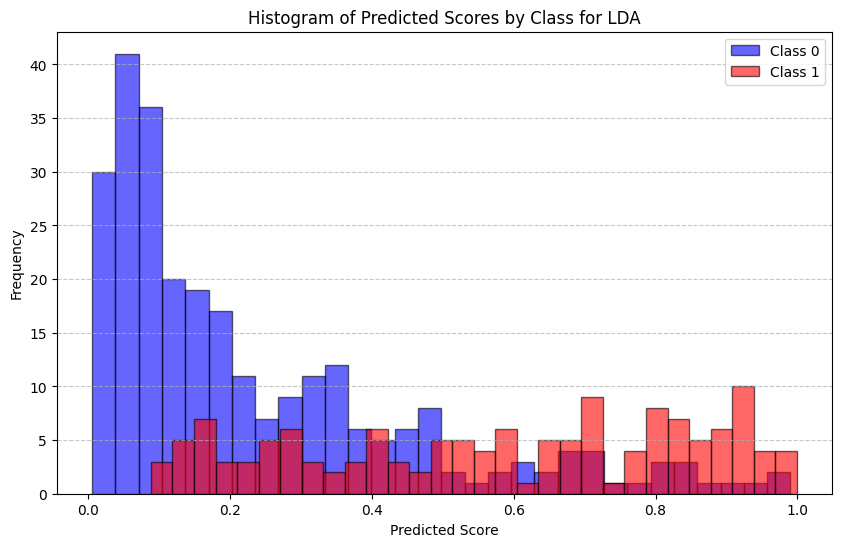

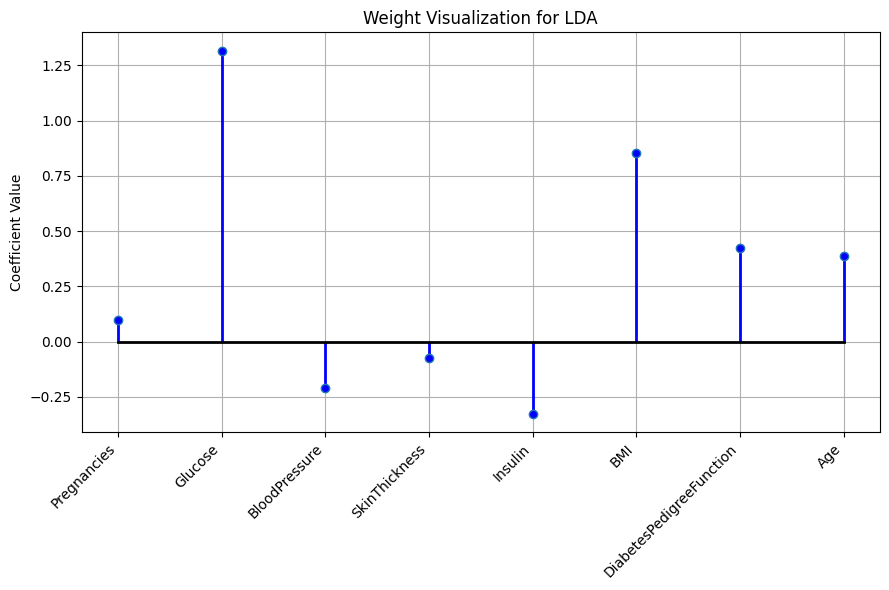

In [22]:
y_scores = lda.predict_proba(x_test_scaled)[:, 1]


scores_class_0 = y_scores[y_test == -1]
scores_class_1 = y_scores[y_test == 1]

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(scores_class_0, bins=30, alpha=0.6, label='Class 0', color='blue', edgecolor='black')
plt.hist(scores_class_1, bins=30, alpha=0.6, label='Class 1', color='red', edgecolor='black')

plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores by Class for LDA")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

coeff = lda.coef_.flatten()

plt.figure(figsize=(9, 6))
markerline, stemlines, baseline = plt.stem(range(len(coeff)), coeff)
plt.setp(markerline, markerfacecolor ='blue', markersize =  6)
plt.setp(stemlines, color = 'blue', linewidth = 2)
plt.setp(baseline, color = 'black', linewidth = 2)

plt.ylabel("Coefficient Value")
plt.title("Weight Visualization for LDA")
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()



## Observations : 

The histogram shows moderate separability between Class 0 and Class 1 in the predicted score space. Class 0 scores cluster around 0, while Class 1 scores are more spread out, with a concentration near 0.6 to 1.0. There is significant overlap between 0.2 and 0.6, indicating uncertainty and potential misclassification. The model performs well at the score extremes but struggles with samples in the middle range.


The stem plot shows that the feature with the highest weight is Glucose, indicating it strongly increases the risk of diabetes, which aligns with medical understanding. BMI, Age, and DiabetesPedigreeFunction also contribute positively, suggesting that higher values increase the risk of diabetes, which is medically reasonable. Pregnancies and SkinThickness have the lowest weights, which also aligns with medical expectations. BloodPressure and Insulin have minimal impact here, which could be due to correlations with other variables or a lack of importance in diabetes risk.

## 2.3 Nonlinear methods

Fitting 10 folds for each of 12 candidates, totalling 120 fits


,LDA,Random Forest (default),Random Forest + GS
AUC,0.843494,0.818362,0.819649
Accuracy,0.794621,0.748166,0.740831


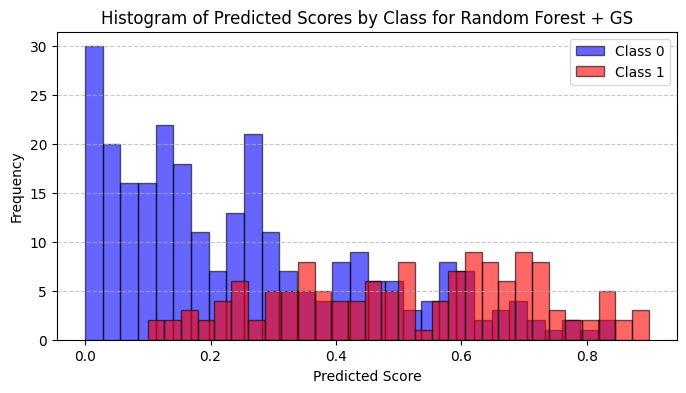

In [23]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(x_train_scaled, y_train)

y_prob_rf_default = rf_default.predict_proba(x_test_scaled)[:, 1]
y_pred_rf_default = rf_default.predict(x_test_scaled)
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)
auc_rf_default = roc_auc_score(y_test, y_prob_rf_default)


rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='roc_auc', cv=10, verbose=1)
grid_search_rf.fit(x_train_scaled, y_train)


best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_


y_prob_best_rf = best_rf.predict_proba(x_test_scaled)[:, 1]
y_pred_best_rf = best_rf.predict(x_test_scaled)

accuracy_rf_opt = accuracy_score(y_test, y_pred_best_rf)
auc_rf_opt = roc_auc_score(y_test, y_prob_best_rf)

data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "Random Forest (default)": [auc_rf_default, accuracy_rf_default],
    "Random Forest + GS": [auc_rf_opt, accuracy_rf_opt],

}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

y_scores_rf = best_rf.predict_proba(x_test_scaled)[:, 1]


scores_class_0_rf = y_scores_rf[y_test == -1]
scores_class_1_rf = y_scores_rf[y_test == 1]

plt.figure(figsize=(8, 4))
plt.hist(scores_class_0_rf, bins=30, alpha=0.6, label='Class 0', color='blue', edgecolor='black')
plt.hist(scores_class_1_rf, bins=30, alpha=0.6, label='Class 1', color='red', edgecolor='black')

plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores by Class for Random Forest + GS")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Fitting 10 folds for each of 18 candidates, totalling 180 fits


,LDA,Random Forest (default),Random Forest,MLPClassifier (default),MLPClassifier + GS
AUC,0.843494,0.818362,0.819649,0.818362,0.750053
Accuracy,0.794621,0.748166,0.740831,0.748166,0.723716


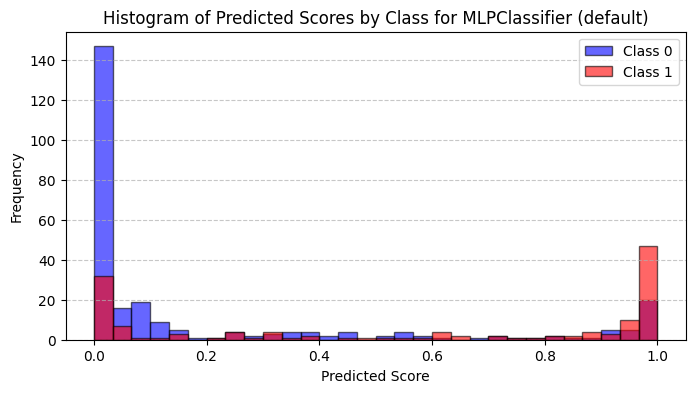

In [24]:
from sklearn.neural_network import MLPClassifier



param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

mlp_default = MLPClassifier(max_iter=2500, random_state=42)
mlp_default.fit(x_train_scaled, y_train)

y_prob_mlp_default = rf_default.predict_proba(x_test_scaled)[:, 1]
y_pred_mlp_default = rf_default.predict(x_test_scaled)
accuracy_mlp_default = accuracy_score(y_test, y_pred_mlp_default)
auc_mlp_default = roc_auc_score(y_test, y_prob_mlp_default)

mlp = MLPClassifier(max_iter=2500, random_state=42)


grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, scoring='roc_auc', cv=10, verbose=1)
grid_search_mlp.fit(x_train_scaled, y_train)


best_mlp = grid_search_mlp.best_estimator_
best_params_mlp = grid_search_mlp.best_params_


y_prob_best_mlp = best_mlp.predict_proba(x_test_scaled)[:, 1]
y_pred_best_mlp = best_mlp.predict(x_test_scaled)

accuracy_mlp_opt = accuracy_score(y_test, y_pred_best_mlp)
auc_mlp_opt = roc_auc_score(y_test, y_prob_best_mlp)


data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "Random Forest (default)": [auc_rf_default, accuracy_rf_default],
    "Random Forest": [auc_rf_opt, accuracy_rf_opt],
    "MLPClassifier (default)": [auc_mlp_default, accuracy_mlp_default],
    "MLPClassifier + GS": [auc_mlp_opt, accuracy_mlp_opt],

}
index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)


y_scores_mlp = mlp_default.predict_proba(x_test_scaled)[:, 1]


scores_class_0_mlp = y_scores_mlp[y_test == -1]
scores_class_1_mlp = y_scores_mlp[y_test == 1]

plt.figure(figsize=(8, 4))
plt.hist(scores_class_0_mlp, bins=30, alpha=0.6, label='Class 0', color='blue', edgecolor='black')
plt.hist(scores_class_1_mlp, bins=30, alpha=0.6, label='Class 1', color='red', edgecolor='black')

plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores by Class for MLPClassifier (default)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Fitting 10 folds for each of 27 candidates, totalling 270 fits


,LDA,Random Forest (default),Random Forest,MLPClassifier (default),MLPClassifier + GS,GradientBoostingClassifier (default),GradientBoostingClassifier
AUC,0.843494,0.818362,0.819649,0.818362,0.750053,0.818362,0.773526
Accuracy,0.794621,0.748166,0.740831,0.748166,0.723716,0.748166,0.709046


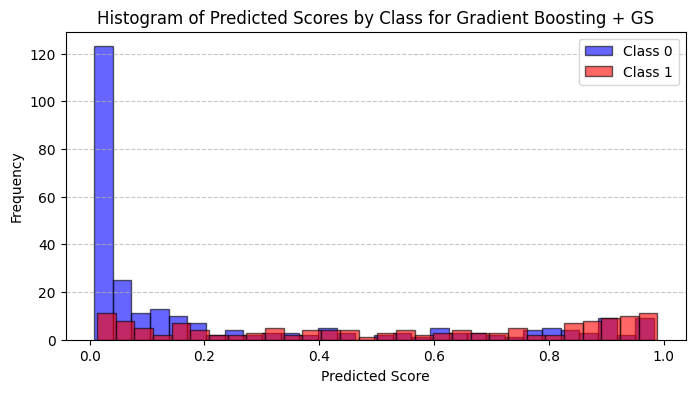

In [25]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_default = GradientBoostingClassifier(random_state=42)
gb_default.fit(x_train_scaled, y_train)

y_prob_gb_default = rf_default.predict_proba(x_test_scaled)[:, 1]
y_pred_gb_default = rf_default.predict(x_test_scaled)
accuracy_gb_default = accuracy_score(y_test, y_pred_gb_default)
auc_gb_default = roc_auc_score(y_test, y_prob_gb_default)


gb = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(gb, param_grid_gb, scoring='roc_auc', cv=10, verbose=1)
grid_search_gb.fit(x_train_scaled, y_train)


best_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

y_prob_best_gb = best_gb.predict_proba(x_test_scaled)[:, 1]
y_pred_best_gb = best_gb.predict(x_test_scaled)

accuracy_gb_opt = accuracy_score(y_test, y_pred_best_gb)
auc_gb_opt = roc_auc_score(y_test, y_prob_best_gb)

data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "Random Forest (default)": [auc_rf_default, accuracy_rf_default],
    "Random Forest": [auc_rf_opt, accuracy_rf_opt],
    "MLPClassifier (default)": [auc_mlp_default, accuracy_mlp_default],
    "MLPClassifier + GS": [auc_mlp_opt, accuracy_mlp_opt],
    "GradientBoostingClassifier (default)": [auc_gb_default, accuracy_gb_default],
    "GradientBoostingClassifier": [auc_gb_opt, accuracy_gb_opt],

}

index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)




y_scores_gb = best_gb.predict_proba(x_test_scaled)[:, 1]

scores_class_0_gb = y_scores_gb[y_test == -1]
scores_class_1_gb = y_scores_gb[y_test == 1]

plt.figure(figsize=(8, 4))
plt.hist(scores_class_0_gb, bins=30, alpha=0.6, label='Class 0', color='blue', edgecolor='black')
plt.hist(scores_class_1_gb, bins=30, alpha=0.6, label='Class 1', color='red', edgecolor='black')

plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores by Class for Gradient Boosting + GS")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Fitting 10 folds for each of 12 candidates, totalling 120 fits


,LDA,Random Forest (default),Random Forest + GS,MLPClassifier (default),MLPClassifier + GS,GradientBoostingClassifier (default),GradientBoostingClassifie + GS,SVC (default),SVC + GS
AUC,0.843494,0.818362,0.819649,0.818362,0.750053,0.818362,0.773526,0.818362,0.808431
Accuracy,0.794621,0.748166,0.740831,0.748166,0.723716,0.748166,0.709046,0.748166,0.753056


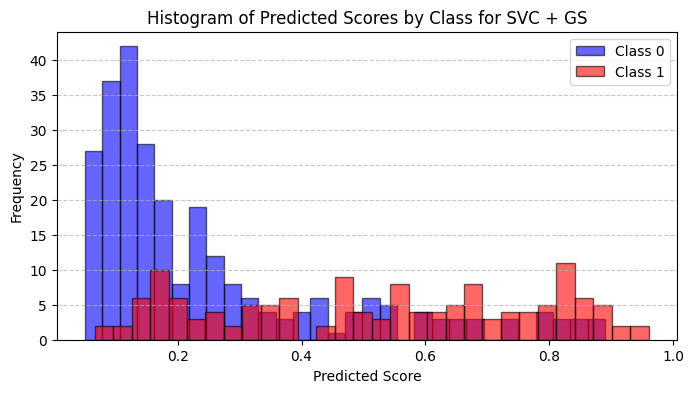

In [26]:
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


svc_default = SVC(probability=True, random_state=42)
svc_default.fit(x_train_scaled, y_train)

y_prob_svc_default = rf_default.predict_proba(x_test_scaled)[:, 1]
y_pred_svc_default = rf_default.predict(x_test_scaled)
accuracy_svc_default = accuracy_score(y_test, y_pred_svc_default)
auc_svc_default = roc_auc_score(y_test, y_prob_svc_default)



svc = SVC(probability=True, random_state=42)

grid_search_svc = GridSearchCV(svc, param_grid_svc, scoring='roc_auc', cv=10, verbose=1)
grid_search_svc.fit(x_train_scaled, y_train)


best_svc = grid_search_svc.best_estimator_
best_params_svc = grid_search_svc.best_params_


y_prob_best_svc = best_svc.predict_proba(x_test_scaled)[:, 1]
y_pred_best_svc = best_svc.predict(x_test_scaled)

accuracy_svc_opt = accuracy_score(y_test, y_pred_best_svc)
auc_svc_opt = roc_auc_score(y_test, y_prob_best_svc)



data = {
    "LDA": [auc_LDA, accuracy_LDA],
    "Random Forest (default)": [auc_rf_default, accuracy_rf_default],
    "Random Forest + GS": [auc_rf_opt, accuracy_rf_opt],
    "MLPClassifier (default)": [auc_mlp_default, accuracy_mlp_default],
    "MLPClassifier + GS": [auc_mlp_opt, accuracy_mlp_opt],
    "GradientBoostingClassifier (default)": [auc_gb_default, accuracy_gb_default],
    "GradientBoostingClassifie + GS": [auc_gb_opt, accuracy_gb_opt],
    "SVC (default)": [auc_svc_default, accuracy_svc_default],
    "SVC + GS": [auc_svc_opt, accuracy_svc_opt],
}

index = ["AUC", "Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)


y_scores_svc = best_svc.predict_proba(x_test_scaled)[:, 1]

scores_class_0_svc = y_scores_svc[y_test == -1]
scores_class_1_svc = y_scores_svc[y_test == 1]

plt.figure(figsize=(8, 4))
plt.hist(scores_class_0_svc, bins=30, alpha=0.6, label='Class 0', color='blue', edgecolor='black')
plt.hist(scores_class_1_svc, bins=30, alpha=0.6, label='Class 1', color='red', edgecolor='black')

plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores by Class for SVC + GS")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Observations : 

Based on the results, the linear model (LDA) outperforms the non-linear models (Random Forest, MLPClassifier, GradientBoostingClassifier, and SVC) on the Pima dataset in terms of AUC and accuracy. The searches were very short with Grid Search for these non-linear methods, but there doesn't seem to be much difference in the results when the parameters change on these non-linear methods. So it's likely that LDA will remain the best even with more advanced calculations.

## 2.4 Comparison and interpretation

| Model                                   | AUC    | Accuracy |
|-----------------------------------------|--------|----------|
| LDA                                     | 0.843  | **<span style="color:red">0.795</span>**    |
| LDA + GS                                | 0.844  | 0.782    |
| QDA                                     | 0.811  | 0.741    |
| QDA + GS                                | **<span style="color:red">0.845</span>**  | 0.775    |
| GaussianNB                              | 0.834  | 0.770    |
| Logistic Regression                     | 0.843  | 0.770    |
| Logistic Regression + GS                | 0.843  | 0.785    |
| Random Forest                           | 0.818  | 0.748    |
| Random Forest + GS                      | 0.820  | 0.741    |
| MLPClassifier                           | 0.818  | 0.748    |
| MLPClassifier + GS                      | 0.750  | 0.724    |
| GradientBoostingClassifier              | 0.818  | 0.748    |
| GradientBoostingClassifier + GS         | 0.774  | 0.709    |
| SVC                                     | 0.818  | 0.748    |
| SVC + GS                                | 0.808  | 0.753    |


## Observations : 

The table shows that the LDA model achieves the highest accuracy (0.795), while the QDA model with Grid Search (GS) has the highest area under the curve (0.845). Both models perform well in practice, with linear methods such as LDA outperforming non-linear models in terms of AUC and accuracy.

In practice, therefore, the method with the best performance and interpretability is the LDA method.

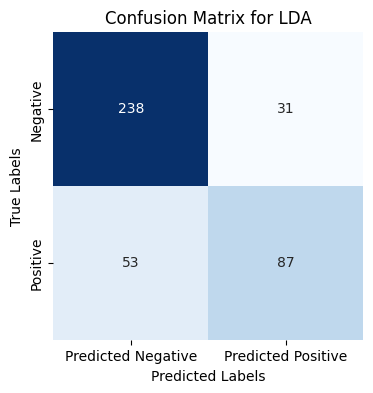

False Negative Rate (Threshold = 0.5): 0.379


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_prob = lda.predict_proba(x_test_scaled)[:, 1]  
threshold = 0.5
y_pred_threshold = np.where(y_prob > threshold, 1, -1)  


conf_matrix = confusion_matrix(y_test, y_pred_threshold, labels=[-1, 1])


conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Predicted Negative', 'Predicted Positive'])


plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

tn, fp, fn, tp = conf_matrix.ravel()


fnr = fn / (fn + tp)


print(f"False Negative Rate (Threshold = 0.5): {fnr:.3f}")


In [ ]:
class CompletedTrade:
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price = trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return (f'Completed Trade for {self.ticker}, {self.trade_volume} shares @ {self.trade_price} '
                f'with action {self.mm_action} on {self.date}. Ref Price: {self.ref_price}, '
                f'Bid Price: {self.bid_price}, Offer Price: {self.offer_price}')

    def __repr__(self):
        return (f'CompletedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, '
                f'trade_price={self.trade_price}, mm_action={self.mm_action}, '
                f'ref_price={self.ref_price}, bid_price={self.bid_price}, '
                f'offer_price={self.offer_price}, date={self.date})')


## Observations: 

In this application, a False Negative Rate (FNR) of 38% is too high. False negatives mean that individuals who have diabetes are incorrectly classified as non-diabetic. Missing a diabetes diagnosis can have serious health consequences, so it is crucial to prioritize minimizing the FNR to ensure that most cases of diabetes are correctly identified. To obtain an FNR below 10%, simply reduce the threshold value. 

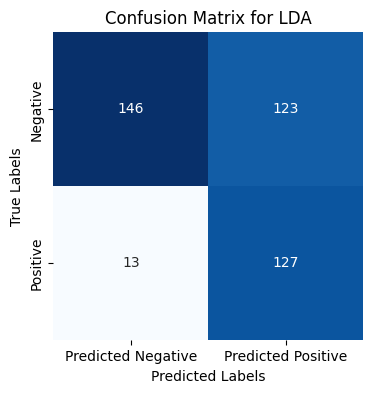

False Negative Rate (Threshold = 0.5): 0.093


In [28]:
y_prob = lda.predict_proba(x_test_scaled)[:, 1]
y_pred = lda.predict(x_test_scaled)

threshold = 0.17
y_pred_threshold = np.where(y_prob > threshold, 1, -1)  


conf_matrix = confusion_matrix(y_test, y_pred_threshold, labels=[-1, 1])
#conf_matrix = confusion_matrix(y_test, y_pred, labels=[-1, 1])

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Predicted Negative', 'Predicted Positive'])


plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

tn, fp, fn, tp = conf_matrix.ravel()


fnr = fn / (fn + tp)


print(f"False Negative Rate (Threshold = 0.5): {fnr:.3f}")

## Observations: 

Thus, with a threshold set at 0.17, we obtain less than 10% false negatives. This comes at the cost of many false-positive predictions, but the medical implications of these errors are less serious.

## 3 Predicting Classes on the Digits dataset

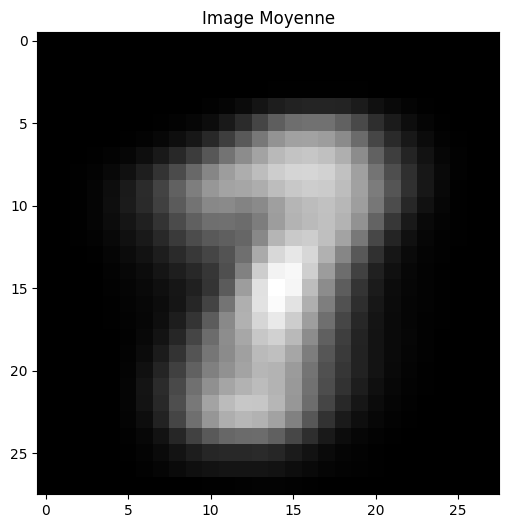

In [29]:
img_moy  = np.zeros(784)
for i in range(784):
    img_moy[i] = np.mean(x2[:,i])
img_moy = img_moy.reshape(28, 28)
plt.figure(figsize=(12, 6))
plt.title("Image Moyenne")
plt.imshow(img_moy, cmap='gray')

In [30]:
lda = LinearDiscriminantAnalysis()

lda.fit(x2, y2.ravel())

y_pred_d_lda = lda.predict(xt2)

accuracy_LDA_d = accuracy_score(yt2, y_pred_d_lda)

data = {
    "LDA": [accuracy_LDA_d],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA
Accuracy,0.933333


In [31]:
shrinkage_values = np.linspace(0, 1, 30).tolist()
param_grid = {
    'shrinkage': shrinkage_values,
    'solver': ['lsqr']
}


lda = LinearDiscriminantAnalysis()


grid_search = GridSearchCV(lda, param_grid, scoring='accuracy', cv=5)

grid_search.fit(x2, y2.ravel())

best_lda = grid_search.best_estimator_

y_pred_best_lda = best_lda.predict(xt2)

accuracy_best_lda = accuracy_score(yt2, y_pred_best_lda)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS ": [accuracy_best_lda],
}
index = ["Accuracy"]

df_results_best = pd.DataFrame(data, index=index)
display(df_results_best)

# Afficher les meilleurs paramètres
print("Best parameters :", grid_search.best_params_)

,LDA,LDA + GS
Accuracy,0.933333,0.946667


Best parameters : {'shrinkage': 0.5517241379310345, 'solver': 'lsqr'}


In [44]:
import warnings
warnings.filterwarnings("ignore")
qda = QuadraticDiscriminantAnalysis()

qda.fit(x2, y2.ravel())

y_pred_d_qda = qda.predict(xt2)

accuracy_QDA_d = accuracy_score(yt2, y_pred_d_qda)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS ": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)


,LDA,LDA + GS,QDA
Accuracy,0.933333,0.946667,0.922667


In [45]:
reg_param_values = np.linspace(0, 1, 30).tolist()

param_grid_qda = {
    'reg_param': reg_param_values
}

qda = QuadraticDiscriminantAnalysis()

grid_search_qda = GridSearchCV(qda, param_grid_qda, scoring='accuracy', cv=5)

grid_search_qda.fit(x2, y2.ravel())

best_qda = grid_search_qda.best_estimator_

y_pred_best_qda = best_qda.predict(xt2)

accuracy_best_qda = accuracy_score(yt2, y_pred_best_qda)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

print("Meilleurs paramètres pour QDA :", grid_search_qda.best_params_)

,LDA,LDA + GS,QDA,QDA + GS
Accuracy,0.933333,0.946667,0.922667,0.977333


Meilleurs paramètres pour QDA : {'reg_param': 0.034482758620689655}


In [46]:
Log = LogisticRegression()

log.fit(x2, y2.ravel())

y_pred_d_log = log.predict(xt2)

accuracy_LOG_d = accuracy_score(yt2, y_pred_d_log)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS ": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,LDA + GS,QDA,QDA + GS,Logistic Regression
Accuracy,0.933333,0.946667,0.922667,0.977333,0.964


In [35]:
param_grid_log = {
    'C': np.logspace(-3, 3, 50),
}

log = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)

grid_search_log = GridSearchCV(log, param_grid_log, scoring='accuracy', cv=5)
grid_search_log.fit(x2, y2.ravel())

best_log = grid_search_log.best_estimator_
y_pred_best_log = best_log.predict(xt2)
accuracy_best_log = accuracy_score(yt2, y_pred_best_log)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
    "Logistic Regression + GS": [accuracy_best_log],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

print("Best parameters :", grid_search_log.best_params_)

,LDA,LDA + GS,QDA,QDA + GS,Logistic Regression,Logistic Regression + GS
Accuracy,0.933333,0.946667,0.922667,0.977333,0.962,0.970667


Best parameters : {'C': np.float64(59.636233165946365)}


In [36]:
svc = SVC()

svc.fit(x2, y2.ravel())

y_pred_d_svc = svc.predict(xt2)

accuracy_SVC_d = accuracy_score(yt2, y_pred_d_svc)

data = {
    "LDA": [accuracy_LDA_d],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
    "Logistic Regression + GS": [accuracy_best_log],
    "SVC": [accuracy_SVC_d],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,QDA,QDA + GS,Logistic Regression,Logistic Regression + GS,SVC
Accuracy,0.933333,0.922667,0.977333,0.962,0.970667,0.983333


In [37]:
param_grid_svc = {
    'C': np.logspace(-2, 2, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

svc = SVC()

grid_search_svc = GridSearchCV(svc, param_grid_svc, scoring='accuracy', cv=5)
grid_search_svc.fit(x2, y2.ravel())

best_svc = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc.predict(xt2)
accuracy_best_svc = accuracy_score(yt2, y_pred_best_svc)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
    "Logistic Regression + GS": [accuracy_best_log],
    "SVC": [accuracy_SVC_d],
    "SVC + GS": [accuracy_best_svc],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

print("Best parameters SVC :", grid_search_svc.best_params_)

,LDA,LDA + GS,QDA,QDA + GS,Logistic Regression,Logistic Regression + GS,SVC,SVC + GS
Accuracy,0.933333,0.946667,0.922667,0.977333,0.962,0.970667,0.983333,0.984


Best parameters SVC : {'C': np.float64(4.6415888336127775), 'kernel': 'rbf'}


In [38]:
mlp = MLPClassifier()

mlp.fit(x2, y2.ravel())

y_pred_d_mlp = mlp.predict(xt2)

accuracy_MLP_d = accuracy_score(yt2, y_pred_d_mlp)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
    "Logistic Regression + GS": [accuracy_best_log],
    "SVC": [accuracy_SVC_d],
    "SVC + GS": [accuracy_best_svc],
    "MLP": [accuracy_MLP_d],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)

display(df_results)

,LDA,LDA + GS,QDA,QDA + GS,Logistic Regression,Logistic Regression + GS,SVC,SVC + GS,MLP
Accuracy,0.933333,0.946667,0.922667,0.977333,0.962,0.970667,0.983333,0.984,0.982667


In [51]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': np.logspace(-4, 1, 6),
}

mlp = MLPClassifier(max_iter=1000)

grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, scoring='accuracy', cv=5)
grid_search_mlp.fit(x2, y2.ravel())

best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(xt2)
accuracy_best_mlp = accuracy_score(yt2, y_pred_best_mlp)

data = {
    "LDA": [accuracy_LDA_d],
    "LDA + GS": [accuracy_best_lda],
    "QDA": [accuracy_QDA_d],
    "QDA + GS": [accuracy_best_qda],
    "Logistic Regression": [accuracy_LOG_d],
    "Logistic Regression + GS": [accuracy_best_log],
    "SVC": [accuracy_SVC_d],
    "SVC + GS": [accuracy_best_svc],
    "MLP": [accuracy_MLP_d],
    "MLP + GS": [accuracy_best_mlp],
}
index = ["Accuracy"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

print("Best parameters MLP :", grid_search_mlp.best_params_)

,LDA,LDA + GS,QDA,QDA + GS,Logistic Regression,Logistic Regression + GS,SVC,SVC + GS,MLP,MLP + GS
Accuracy,0.933333,0.946667,0.922667,0.977333,0.964,0.970667,0.983333,0.984,0.982667,0.983333


Best parameters MLP : {'activation': 'relu', 'alpha': np.float64(0.0001), 'hidden_layer_sizes': (100, 50)}


| Model                                   |Accuracy|
|-----------------------------------------|--------|
| LDA                                     | 0.933  |    
| LDA + GS                                | 0.947  | 
| QDA                                     | 0.923  | 
| QDA + GS                                | 0.977  |
| Logistic Regression                     | 0.962  | 
| Logistic Regression + GS                | 0.971  | 
| SVC                                     | 0.983  | 
| SVC + GS                                | **<span style="color:red">0.984</span>**  | 
| MLPClassifier                           | 0.983  | 
| MLPClassifier + GS                      | 0.983  | 


## 3.2 Interpreting the classifier

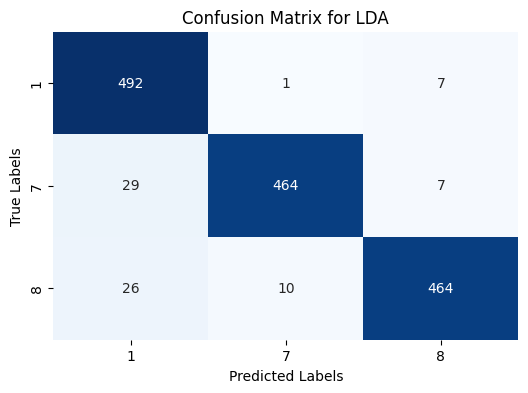

,LDA + GS
Accuracy,0.946667
Nb errors,80


In [78]:
confusion_LDA = confusion_matrix(yt2, y_pred_best_lda, labels=[1, 7, 8])

conf_matrix_df = pd.DataFrame(confusion_LDA, index=['1', '7', '8'],
                              columns=['1', '7', '8'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


mauvaises_predictions_lda = confusion_LDA.sum() - np.trace(confusion_LDA)


data = {
    "LDA + GS": [accuracy_best_lda,  f"{mauvaises_predictions_lda:.0f}"],
}
index = ["Accuracy", "Nb errors"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

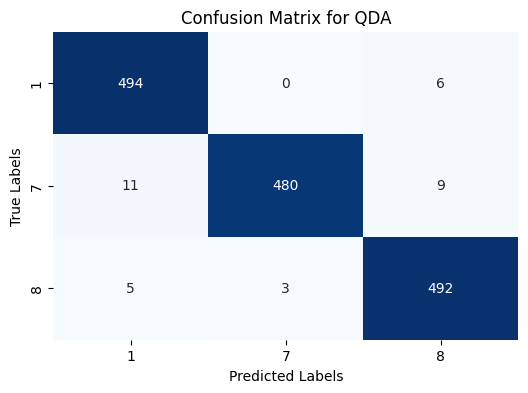

,LDA + GS,QDA + GS
Accuracy,0.946667,0.977333
Nb errors,80,34


In [80]:
confusion_QDA = confusion_matrix(yt2, y_pred_best_qda, labels=[1, 7, 8])

conf_matrix_df = pd.DataFrame(confusion_QDA, index=['1', '7', '8'],
                              columns=['1', '7', '8'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

mauvaises_predictions_qda = confusion_QDA.sum() - np.trace(confusion_QDA)

data = {
    "LDA + GS": [accuracy_best_lda,  f"{mauvaises_predictions_lda:.0f}"],
    "QDA + GS": [accuracy_best_qda,  f"{mauvaises_predictions_qda:.0f}"],
}
index = ["Accuracy", "Nb errors"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

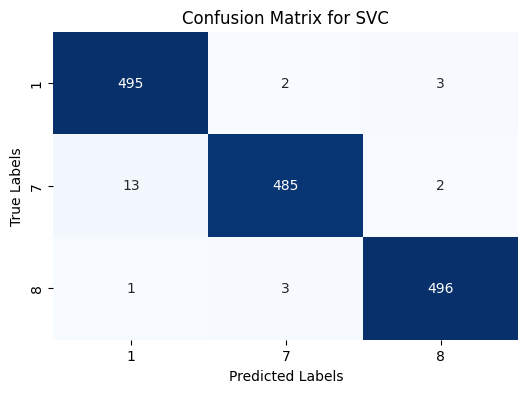

,LDA + GS,QDA + GS,SVC + GS
Accuracy,0.946667,0.977333,0.984
Nb errors,80,34,24


In [81]:
confusion_SVC = confusion_matrix(yt2, y_pred_best_svc, labels=[1, 7, 8])

conf_matrix_df = pd.DataFrame(confusion_SVC, index=['1', '7', '8'],
                              columns=['1', '7', '8'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

mauvaises_predictions_svc = confusion_SVC.sum() - np.trace(confusion_SVC)

data = {
    "LDA + GS": [accuracy_best_lda,  f"{mauvaises_predictions_lda:.0f}"],
    "QDA + GS": [accuracy_best_qda,  f"{mauvaises_predictions_qda:.0f}"],
    "SVC + GS": [accuracy_best_svc,  f"{mauvaises_predictions_svc:.0f}"],
}
index = ["Accuracy", "Nb errors"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

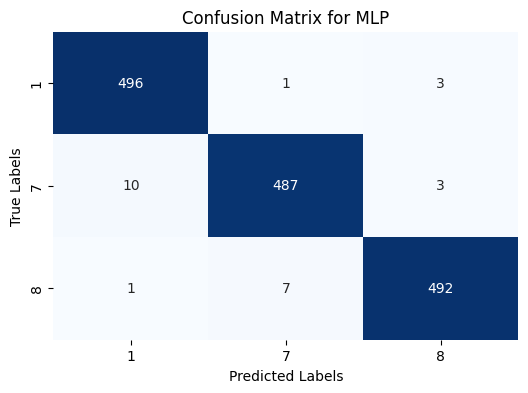

,LDA + GS,QDA + GS,SVC + GS,MLP + GS
Accuracy,0.946667,0.977333,0.984,0.983333
Nb errors,80,34,24,25


In [83]:
confusion_MLP = confusion_matrix(yt2, y_pred_best_mlp, labels=[1, 7, 8])

conf_matrix_df = pd.DataFrame(confusion_MLP, index=['1', '7', '8'],
                              columns=['1', '7', '8'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

mauvaises_predictions_mlp = confusion_MLP.sum() - np.trace(confusion_MLP)

data = {
    "LDA + GS": [accuracy_best_lda,  f"{mauvaises_predictions_lda:.0f}"],
    "QDA + GS": [accuracy_best_qda,  f"{mauvaises_predictions_qda:.0f}"],
    "SVC + GS": [accuracy_best_svc,  f"{mauvaises_predictions_svc:.0f}"],
    "MLP + GS": [accuracy_best_mlp,  f"{mauvaises_predictions_mlp:.0f}"],
}

index = ["Accuracy", "Nb errors"]

df_results = pd.DataFrame(data, index=index)
display(df_results)

## Observations :

- Best classfier : The best classifier on this dataset among those tested appears to be the validated SVC classifier. It achieves very good prediction results, very slightly better than those obtained with MLP for the cases we tested. 

- Most difficult class : Confusion matrices, particularly the CVS matrix, show that class '7' is the most difficult to predict in this dataset. Indeed, 7s are sometimes predicted as 1s by the model. Interestingly, on the contrary, 1s are less often predicted as 7s. 


## Examples of samples miss-classified : 

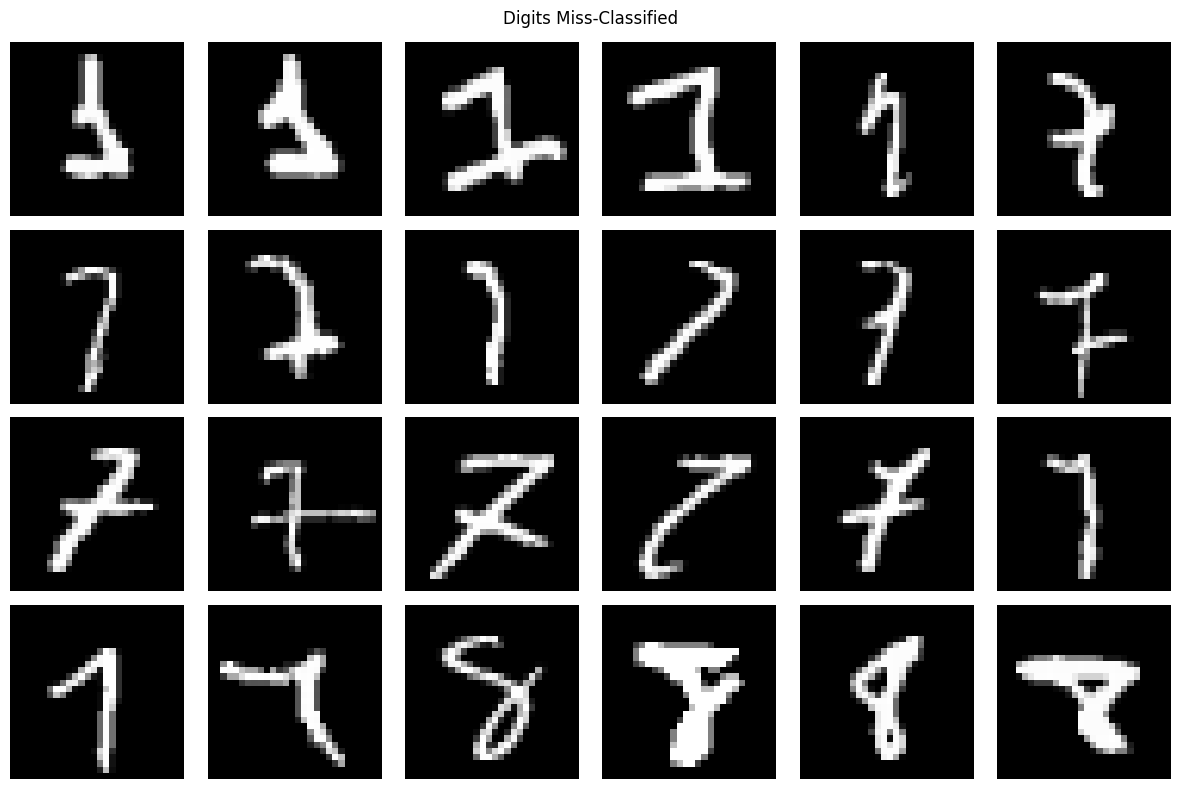

In [164]:
index_miss = []
plt.figure(figsize=(12, 8)) 
count = 0

for i in range(1, len(y_pred_best_svc)):
    if yt2.flatten()[i] != y_pred_best_svc[i] and count < 24:
        img = xt2[i].reshape(28, 28)
        plt.subplot(4, 6, count + 1) 
        plt.imshow(img, cmap='gray')
        index_miss.append(i)
        plt.axis('off') 
        count += 1  

plt.suptitle("Digits Miss-Classified")
plt.tight_layout()
plt.show()

## Observations : 

The classifier failed to recognize certain digits due to visual ambiguity. Some digits resemble others, like "7" appearing similar to "1," and variations in handwriting styles hinder generalization. Additionally, blurry or faint lines, as well as overlapping strokes, disrupt shape detection. These combined factors make accurate classification of certain samples challenging.

## Creation Noisy Sample with a '1'

Accuracy on noisy samples: 0.982
Number of misclassified samples: 18


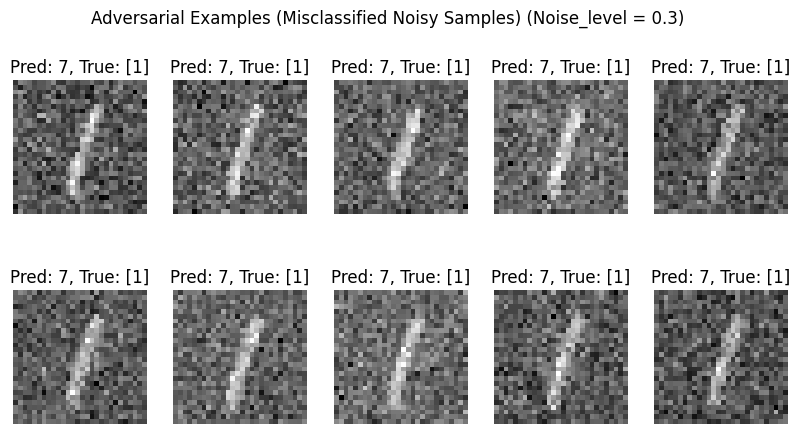

Accuracy on noisy samples: 0.0
Number of misclassified samples: 1000


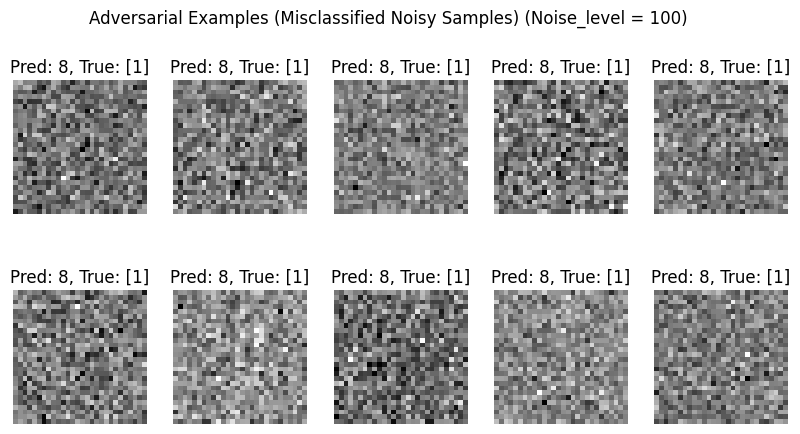

In [191]:
sample = xt2[1].reshape(28, 28)

num_samples = 1000
noise_level = 0.3

noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])

noisy_samples_flat = noisy_samples.reshape(num_samples, -1)

y_pred_noisy = best_svc.predict(noisy_samples_flat)

accuracy_noisy = np.mean(y_pred_noisy ==  yt2[1])

print("Accuracy on noisy samples:", accuracy_noisy)

if accuracy_noisy < 1.0:
    misclassified_indices = np.where(y_pred_noisy != yt2[1])[0]
    print(f"Number of misclassified samples: {len(misclassified_indices)}")

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[1]}")
        plt.axis('off')
    plt.suptitle("Adversarial Examples (Misclassified Noisy Samples) (Noise_level = 0.3)")
    plt.show()

noise_level = 100

noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])

noisy_samples_flat = noisy_samples.reshape(num_samples, -1)

y_pred_noisy = best_svc.predict(noisy_samples_flat)

accuracy_noisy = np.mean(y_pred_noisy ==  yt2[1])

print("Accuracy on noisy samples:", accuracy_noisy)

if accuracy_noisy < 1.0:
    misclassified_indices = np.where(y_pred_noisy != yt2[1])[0]
    print(f"Number of misclassified samples: {len(misclassified_indices)}")

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[1]}")
        plt.axis('off')
    plt.suptitle("Adversarial Examples (Misclassified Noisy Samples) (Noise_level = 100)")
    plt.show()


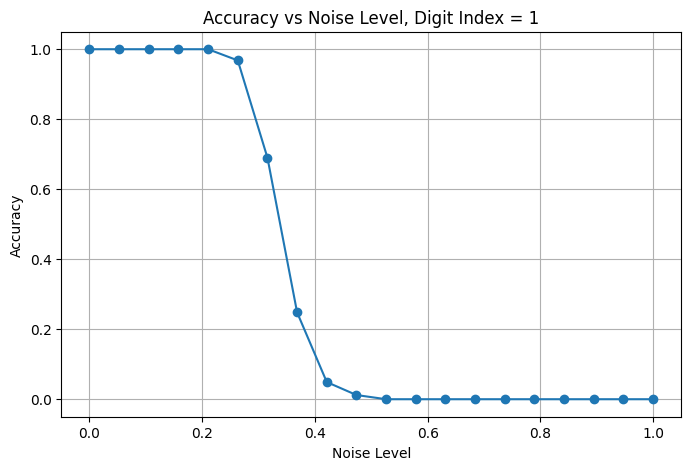

<Figure size 1000x500 with 0 Axes>

In [181]:
sample = xt2[1].reshape(28, 28)


num_samples = 1000
noise_levels = np.linspace(0, 1.0, 20)  
accuracies = []


for noise_level in noise_levels:
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    accuracy_noisy = np.mean(y_pred_noisy == yt2[1])
    accuracies.append(accuracy_noisy)

plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o')
plt.title("Accuracy vs Noise Level, Digit Index = 1")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

if accuracies[-1] < 1.0:
    noise_level = noise_levels[np.argmin(np.array(accuracies) < 1.0)]
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    
    misclassified_indices = np.where(y_pred_noisy != yt2[1])[0]
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[1]}")
        plt.axis('off')
    plt.suptitle(f"Adversarial Examples at Noise Level {noise_level}")
    plt.show()

## Creation Noisy Sample with a '7'

Accuracy on noisy samples: 0.972
Number of misclassified samples: 28


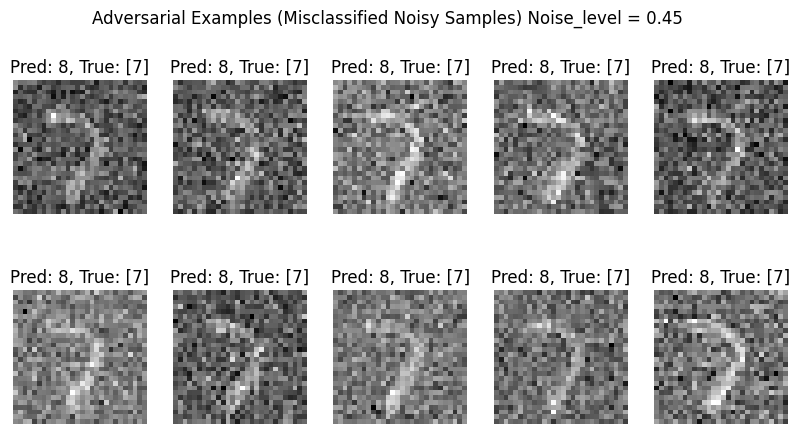

Accuracy on noisy samples: 0.0
Number of misclassified samples: 1000


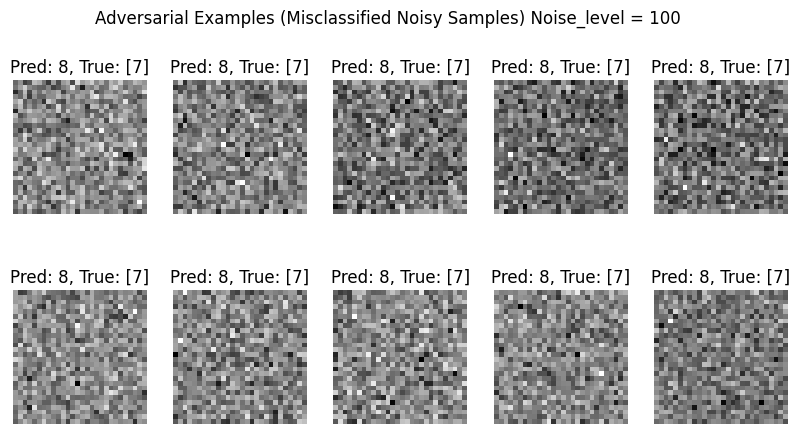

In [192]:
sample = xt2[800].reshape(28, 28)

num_samples = 1000
noise_level = 0.45

noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
y_pred_noisy = best_svc.predict(noisy_samples_flat)
accuracy_noisy = np.mean(y_pred_noisy ==  yt2[800])

print("Accuracy on noisy samples:", accuracy_noisy)

if accuracy_noisy < 1.0:
    misclassified_indices = np.where(y_pred_noisy != yt2[800])[0]
    print(f"Number of misclassified samples: {len(misclassified_indices)}")

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[800]}")
        plt.axis('off')
    plt.suptitle("Adversarial Examples (Misclassified Noisy Samples) Noise_level = 0.45")
    plt.show()

noise_level = 100

noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
y_pred_noisy = best_svc.predict(noisy_samples_flat)
accuracy_noisy = np.mean(y_pred_noisy ==  yt2[800])

print("Accuracy on noisy samples:", accuracy_noisy)

if accuracy_noisy < 1.0:
    misclassified_indices = np.where(y_pred_noisy != yt2[800])[0]
    print(f"Number of misclassified samples: {len(misclassified_indices)}")

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[800]}")
        plt.axis('off')
    plt.suptitle("Adversarial Examples (Misclassified Noisy Samples) Noise_level = 100")
    plt.show()

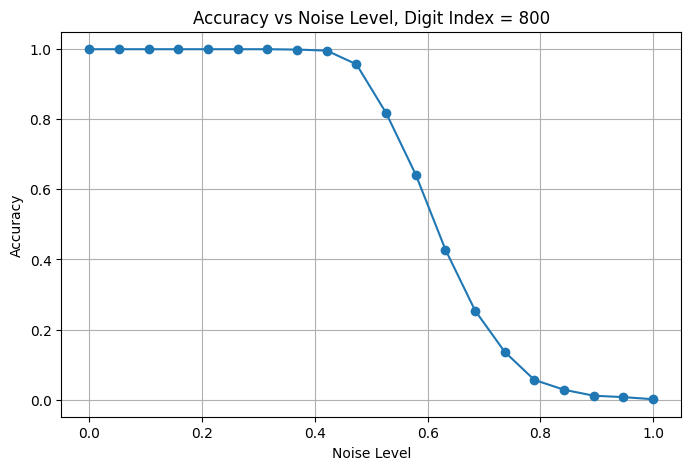

<Figure size 1000x500 with 0 Axes>

In [185]:
sample = xt2[800].reshape(28, 28)

num_samples = 1000
noise_levels = np.linspace(0, 1.0, 20)  
accuracies = []


for noise_level in noise_levels:
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    accuracy_noisy = np.mean(y_pred_noisy == yt2[800])
    accuracies.append(accuracy_noisy)

plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o')
plt.title("Accuracy vs Noise Level, Digit Index = 800")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

if accuracies[-1] < 1.0:
    noise_level = noise_levels[np.argmin(np.array(accuracies) < 1.0)]
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    
    misclassified_indices = np.where(y_pred_noisy != yt2[800])[0]
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[800]}")
        plt.axis('off')
    plt.suptitle(f"Adversarial Examples at Noise Level {noise_level}")
    plt.show()

## Creation Noisy Sample with a '8'

Accuracy on noisy samples: 1.0


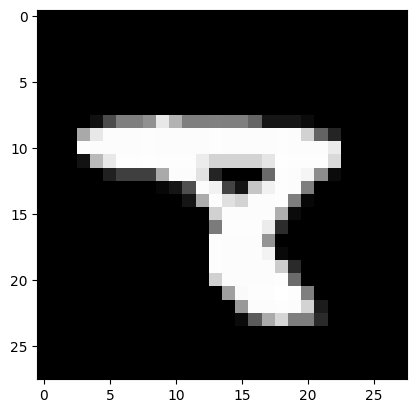

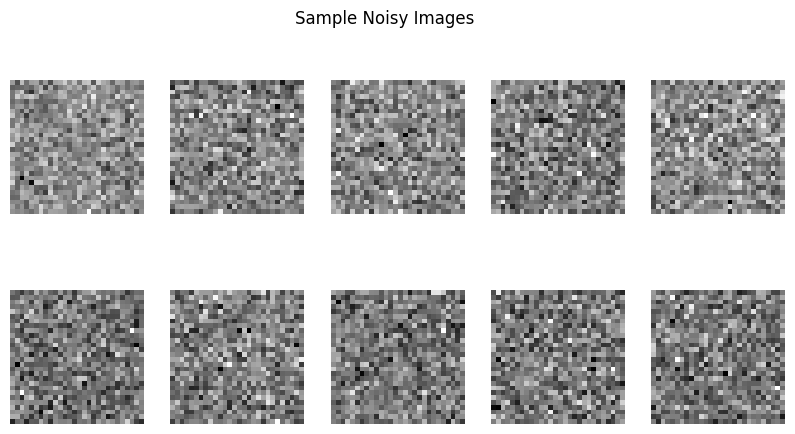

In [193]:
sample = xt2[index_miss[23]].reshape(28, 28)
num_samples = 1000
noise_level = 10^60
plt.imshow(sample, cmap='gray')
noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])

noisy_samples_flat = noisy_samples.reshape(num_samples, -1)

y_pred_noisy = best_svc.predict(noisy_samples_flat)

accuracy_noisy = np.mean(y_pred_noisy ==  yt2[index_miss[23]])

print("Accuracy on noisy samples:", accuracy_noisy)


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(noisy_samples[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Noisy Images")
plt.show()

if accuracy_noisy < 1.0:
    misclassified_indices = np.where(y_pred_noisy != yt2[index_miss[23]])[0]
    print(f"Number of misclassified samples: {len(misclassified_indices)}")
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[index_miss[23]]}")
        plt.axis('off')
    plt.suptitle("Adversarial Examples (Misclassified Noisy Samples)")
    plt.show()

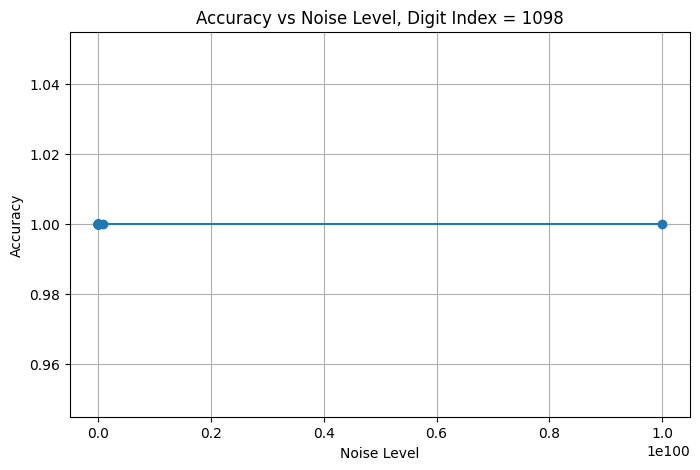

In [189]:
sample = xt2[1098].reshape(28, 28)

num_samples = 1000
noise_levels = np.logspace(-3, 100, 50)  
accuracies = []


for noise_level in noise_levels:
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    accuracy_noisy = np.mean(y_pred_noisy == yt2[1098])
    accuracies.append(accuracy_noisy)

plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o')
plt.title("Accuracy vs Noise Level, Digit Index = 1098")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

if accuracies[-1] < 1.0:
    noise_level = noise_levels[np.argmin(np.array(accuracies) < 1.0)]
    noisy_samples = np.array([sample + noise_level * np.random.randn(28, 28) for _ in range(num_samples)])
    noisy_samples = np.clip(noisy_samples, 0, 1)
    noisy_samples_flat = noisy_samples.reshape(num_samples, -1)
    y_pred_noisy = best_svc.predict(noisy_samples_flat)
    
    misclassified_indices = np.where(y_pred_noisy != yt2[1098])[0]
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(noisy_samples[idx], cmap='gray')
        plt.title(f"Pred: {y_pred_noisy[idx]}, True: {yt2[1098]}")
        plt.axis('off')
    plt.suptitle(f"Adversarial Examples at Noise Level {noise_level}")
    plt.show()

## Observations : 

The SVC classifier correctly predicts the classes with moderate Gaussian noise, but the accuracy gradually decreases as the noise level increases. Interestingly, with moderate Gaussian noise, '1's are often misclassified as '7's. However, when the Gaussian noise becomes dominant, the classifier consistently predicts '8' regardless of the input. This is because the added noise appears more similar to an '8' than to a '7' or '1'. This observation explains why the accuracy trends toward 0 when conducting the experiment starting from digits '1' or '7'.

## Bonus: Convolutional Neural network (CNN)

In [ ]:
import torch

learning_rate = 0.01
n_epochs = 10
batch_size = 64
nb_classes = 3

nb_filters = 32
kernel_size = (3, 3) 
pool_size = (2, 2) 

x_dim = y_dim = 28


n_h_0 = 1
n_h_1 = nb_filters
n_h_2 = nb_filters
n_in_linear = nb_filters * (x_dim//2)*(y_dim // 2)

cnn_model = torch.nn.Sequential(
    torch.nn.Conv2d(n_h_0, n_h_1, kernel_size, stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.Conv2d(n_h_1, n_h_2, kernel_size, stride= (1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
    torch.nn.Flatten(),
    torch.nn.Linear(n_in_linear, nb_classes)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr = learning_rate)

def vector_to_class(x):
  y = torch.nn.functional.softmax(x, dim = 1)
  y = torch.argmax(y, dim = 1)
  return y

def cnn_accuracy(predict, labels):
  accuracy = np.sum(predict==labels) / len(labels)
  return accuracy

x_train_tensor = torch.tensor(x2, dtype=torch.float32)
y_train_tensor = torch.tensor(y2, dtype=torch.long)
x_test_tensor = torch.tensor(xt2, dtype=torch.float32)
y_test_tensor = torch.tensor(yt2, dtype=torch.long)

y_train_tensor[y_train_tensor==1] = 0
y_train_tensor[y_train_tensor==7] = 1
y_train_tensor[y_train_tensor==8] = 2

y_test_tensor[y_test_tensor==1] = 0
y_test_tensor[y_test_tensor==7] = 1
y_test_tensor[y_test_tensor==8] = 2

In [ ]:
from torch.utils.data import Dataset, DataLoader
class MNISTDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X  
        self.Y = Y  

    def __len__(self):
        return len(self.X) 

    def __getitem__(self, idx):
     
        image = torch.tensor(self.X[idx], dtype=torch.float32)
        label = torch.tensor(self.Y[idx], dtype=torch.long)    
        return image, label


dataset = MNISTDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(dataloader):

    predict = cnn_model(imgs.reshape(-1, 1, 28, 28)) 
    
 
    loss = criterion(predict, labels.squeeze()) 
   
    optimizer.zero_grad() 
   
    loss.backward() 
 
    optimizer.step() 
 
    train_loss += loss.item()
    
    all_labels.extend(labels.squeeze().tolist())
    all_predicted.extend(vector_to_class(predict).tolist())

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(dataloader.dataset)))
  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

In [ ]:
predict_test = np.array(vector_to_class(cnn_model(x_test_tensor.reshape(-1, 1, 28, 28))))
test_accuracy = cnn_accuracy(predict_test, np.array(y_test_tensor).squeeze())
print("Test Accuracy:", test_accuracy.item())

The result obtained once executed (result deleted...) : Test Accuracy: 0.987